In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});


<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

<span style='font-family:"Times New Roman"'> 
<span style="line-height:200%"> 
<span style="font-size:14px">
    
# Introduction
&emsp;&emsp; Mechanistic home range models (MHRMs) are a useful tool for analyzing patterns of animal space use. Due to their spatially explicit design, MHRMs are often used to generate predictions of animal movement (Moorcroft & Barnett 2008). In Moorcroft & Barnett (2008), the authors illustrate how MHRMs can be used to generate predictions for a simplified case of animal movement &mdash; an individual moving on a one-dimensional landscape. Specifically, Moorcroft & Barnett utilize the advection-diffusion equation to model expected patterns of animal space use. Furthermore, Moorcroft & Barnett reveal that the steady-state pattern of space use is approximately proportional to the square of the habitat preference function; thus, providing an analytical approximation of an equilibrium solution to the advection-diffusion equation. In this paper, I will summarize the analysis in Moorcroft & Barnett (2008) and attempt to replicate their analytical solution for steady state space use by numerically solving the advection-diffusion equation. 

&emsp;&emsp; According to Moorcroft & Barnett (2008), an animal moving in a one-dimensional landscape has a preference for various habitat than can be expressed by a resource selection function $w(x)$. Moreover, Moorcroft & Barnett (2008) dictate that if $w(x)$ is constant (i.e. the animal has no habitat preference), then an animal's movement is decided exclusively by $\phi (x - x')$. Here, $\phi (x - x')$ refers to the probability of an animal moving right or left of its current position $x'$ during time interval $\tau$ (Moorcroft & Barnett, 2008). Together, $w(x)$ and $\phi (x - x')$ form a redistribution kernel that describes the probability of an animal moving from its current position $x'$ to a new location $x$ over a period $\tau$ in a landscape with varying preference (Moorcroft & Barnett, 2008). In Moorcroft & Barnett (2008), the redistribution kernel is written as follows:
    
\begin{equation} P(x' \longrightarrow x) = k_{\tau}(x,x') = \frac{\phi(x - x')w(x)}{\int_{-\infty}^{\infty} \phi(x'' - x')w(x)dx''}\end{equation}

&emsp;&emsp; After defining the redistribution kernel, Moorcroft & Barnett (2008) introduce $u(x,t)dx$ as the "probability that an individual is located between $x$ and $x + dx$ at time $t$." The integral of the product of the redistribution kernel and $u(x,t)dx$ is equal to $u(x,t + \tau)$ &mdash; an expression which describes all of the possible ways that an "individual located at $x'$ can arrive within the interval $(x,x+dx)$ at time $t +\tau$" (Moorcroft & Barnett, 2008). In Moorcroft & Barnett (2008), $u(x,t+ \tau)$ is written accordingly:
    
\begin{equation} u(x,t+ \tau) = \int_{-\infty}^{\infty} k_{\tau}(x,x')u(x',t)dx' \end{equation}

&emsp;&emsp; After defining $u(x,t+ \tau)$, Moorcroft & Barnett (2008) re-write Equation 2 in the form of an advection-diffusion equation by employing a Taylor series expansion and taking the limit as $\tau \longrightarrow 0$:
    
\begin{equation} \frac{\partial u(x,t)}{\partial t} = -\frac{\partial}{\partial x}[c(x)u(x,t)] + \frac{\partial ^2}{\partial x^2}[d(x)u(x,t)]\end{equation}
 
&emsp;&emsp; Moorcroft & Barnett further define the advection coefficient $c(x)$ and the diffusion coefficient $d(x)$ using:
    
\begin{equation} c(x) = \lim_{\tau \to 0} \frac{M_2 (\tau)}{\tau} \frac{w_x (x)}{w(x)} \end{equation}

\begin{equation} d(x) = \lim_{\tau \to 0} \frac{M_2 (\tau)}{2\tau} \end{equation}

&emsp;&emsp; $M_2$ in Equations 3 and 4 refers to the "second moment" and is characterized by Moorcroft & Barnett (2008) as:

\begin{equation} M_2(\tau) = \int_{}{} \rho ^2 \phi_\tau(x)dx\end{equation}

&emsp;&emsp; Here $\rho$ refers to the mean step length of the animal and $\phi (x)$ is the probability distribution of an animal's movement distances. Because $\rho$ is a constant, it can be factored out of the integral in Equation 6. Furthermore, since $\phi (x)$ is a probability distribution function, its integral is equal to 1. Therefore, Equation 6 may be re-written as:

\begin{equation} M_2(\tau) = \rho ^2 \end{equation}

&emsp;&emsp; It is important to note that based on the definitions of $c(x)$ and $d(x)$ given by Equations 4, 5, and 7, the advection coefficient $c(x)$ varies in space, while the diffusion coefficient $d(x)$ is constant. After defining $c(x)$ and $d(x)$, Moorcroft & Barnett substitute Equations 4 and 5 into Equation 3. They then set $\frac{\partial u}{\partial t}$ in Equation 3 equal to 0 and take the limit of $u(x,t)$ as $\tau \longrightarrow \infty$. In doing so, the authors derive an analytical approximation for the expected steady-state pattern of space use:

\begin{equation} u^* (x) = \frac{1}{W_0}w(x)^2 \end{equation}

&emsp;&emsp; Here $W_0 = \int_{\Omega}{}w(x)^2$ which is the integral of the square of the preference function taken over the entire spatial domain. Evidently, Equation 8 suggests that the expected steady-state pattern of space use by an individual is proportional to the square of the individual's habitat preference function. Now that I have summarized the analysis in Moorcroft & Barnett (2008), I will attempt to replicate the authors' analytical solution for the expected pattern of space use by numerically solving Equation 3.
    
# Numerical Solution for the Diffusion Equation in One Dimension
    
&emsp;&emsp; In order to replicate the analysis presented in Moorcroft & Barnett (2008), I will begin by seeking a numerical solution to the diffusion equation in one dimension. Specifically, I will employ the finite difference method as presented in *Computational Aerodynamics and Fluid Dynamics: an Introduction* by Jean-Jacques Chattot (2002). In accordance with Chattot (2002), I will start by discretizing the spatial and temporal domains using a set of equally spaced mesh points given by:
   
$$x_i = i\Delta x,      i=0,...,N_x,$$
$$t_j = j \Delta t,     j=0,...,N_t$$ 

&emsp;&emsp; Where $x_i$ is the total number of points of the spatial discretization, $\Delta x$ is the spatial discretization step, $t_j$ is the total number of points of the temporal discretization, and $ \Delta t$ is the temporal discretization step. After discretizing the domains, the derivatives in the diffusion equation can be replaced by finite difference approximations. For the time derivative, Chattot (2002) utilizes a forward difference approximation given by:

\begin{equation} \frac{\partial u}{\partial t}= \frac {u_{i,j+1} - u_{i,j}}{\Delta t} \end{equation}

&emsp;&emsp; For the space derivative, Chattot (2002) uses centered difference approximation given by:

\begin{equation}  \frac{{\partial}^2 u}{\partial {x}^2}= \frac {u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2} \end{equation}

&emsp;&emsp; Substituting these approximations into the the diffusion equation yields the following:

\begin{equation} \frac {u_{i,j+1} - u_{i,j}}{\Delta t} = k \left(\frac {u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2}\right) \end{equation}

&emsp;&emsp; Here, $k$ refers to the diffusion coefficient. Finally, rearranging the terms of equation 3 produces the following finite difference scheme for the numerical solution to the diffusion equation in one dimension:

 \begin{equation} u_{i,j+1} = u_{i,j} + r(u_{i+1,j} -2u_{i,j} + u_{i-1,j}) \end{equation}

&emsp;&emsp; Where $r$, the Fourier number, is given by:

$$r = k \left(\frac {\Delta t}{\Delta x^2}\right)$$

&emsp;&emsp; Using Python version 3.9.13, I will implement the finite difference scheme described above to numerically solve the diffusion equation in one dimension. The first step in my analysis is to specify the bounds of the spatial domain, the bounds of the time domain, $\Delta t$, $\Delta x$, and the diffusion coefficient. Here, I set the bounds of the spatial domain to be $[0,20]$, the bounds of the time domain to be $[0,500]$, $\Delta t$ to be 0.01, and $\Delta x$ to be 0.05.

&emsp;&emsp; According to Barnett & Moorcroft (2008), the diffusion coefficient should be defined using Equation 5 above. Assuming $\Delta t$ is sufficiently small, we may drop $\lim_{\tau \to 0}$ in Equation 5 and express the diffusion coefficient simply as:
    
\begin{equation} d(x) = k = \rho ^2 \end{equation}
    
&emsp;&emsp; Where $\rho$ is the mean step length of the animal. Here, the mean step length of the animal is assumed to be 0.04. Ideally, the mean step length of the animal should be obtained from observations of the animal's movement in the wild (P. Moorcroft, personal communication, December 18, 2022). However in the absence of movement data, a "realistic" choice for the mean step length can be used (P. Moorcroft, personal communication, December 18, 2022). For example, if we assume here that $\Delta t$ has units of hours and $\Delta x$ has units of kilometers, then a mean step length of 0.04 would correspond to a movement speed of $4 \frac{km}{hour}$. Depending on the animal, a movement speed of $4 \frac{km}{hour}$ may or may not be realistic.
    
```python
# Domain Bounds
start = 0 # start bound
stop = 20 # stop bound

# Model Parameters
dt = 0.01 # delta t
T = 500 # total time
Nt = int(T / dt)  # number of time steps
dx = 0.05  # delta x
Nx = int((abs(stop-start))/dx)  # number of x steps
mean_sl = 0.04 # mean step length of the animal
k = (mean_sl**2)/2/dt # diffusion coefficient equal to mean step length squared
r = k * dt / dx / dx  # Fourier number
```
&emsp;&emsp; The stability of the finite difference scheme in Equation 12 is sensitive to certian choices of $\Delta t$, $\Delta x$, and mean step length. In order to avoid numerical instability, the fourier number, $r$, must obey the following inequality (J. Cain, personal communication, December 22, 2022):

$$r = k \left(\frac {\Delta t}{\Delta x^2}\right) < \frac{1}{2}$$

&emsp;&emsp; As such, I include a flag that generates a warning if current choices of $\Delta t$, $\Delta x$, and mean step length will yield numerical instability.

```python
# Fourier number flag
if r > 0.5:
    print("WARNING: Fourier number > 0.5")
```
&emsp;&emsp; After specifying the model parameters and checking that the stability conditions are satisfied, the spatial and temporal domains can be discretized using a numpy array. The number of rows in the array are given by the number of time-steps, $N_t$, as specified above. The number of columns in the array are given by the number of x-steps, $N_x$, also specified above. In each cell of the array, the spatial position, $x_i$, and the probability density at position $x_i$ and time $t_j$, given by $u(x_i,t_j)$, are stored.

```python
# Initializing x values where u(x,t) will be calculated
Xs = np.arange(start, stop + dx, dx)

# Initializing array with Nt rows, Nx columns, and [x,u(x,t)] per cell
u = np.zeros((Nt, 2, len(Xs)))

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs
```
&emsp;&emsp; For the inital conditions, I am using Gaussian function defined by $\mu = 10$ and $\sigma = 0.5$. Because this script models the evolution of a probability density function (PDF), a Gaussian initial condition is appropriate since such function integrate to 1.  

```python
# Gaussian function used to specify initial conditions
def gaussian(x, mu, sigma):
    denom = sigma * ((2 * math.pi)**0.5)
    numerator = math.exp(((x - mu)**2) / ((sigma) **2) / -2)
    res = numerator / denom
    return res 

# Specifying inital conditions
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                     mu = 10,
                    sigma = 0.5) 
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC 
```
&emsp;&emsp; After discretizng the temporal and spatial domains as well as specifying the initial conditions, I then numerically solve for $u(x,t)$ at future time-steps using the finite difference scheme described by Equation 4. When executing the finite difference scheme in Equation 4, it is imperative that one chooses appropriate boundary conditions. Dirichlet boundary conditions should be avoided since such boundary conditions do not allow for conservation of area under the curve. Because I am modeling the evolution of a PDF, the area under the curve should remain constant as $t \longrightarrow \infty$. Zero-flux Neumann boundary conditions are a more appropriate choice, as they allow for conservation of area under the curve, but such boundary conditions are difficult to execute in code. 

&emsp;&emsp; Here, I opt to use periodic boundary conditions. Like the Neumann boundary conditions, periodic boundary conditions allow for the area under the curve to be conserved which is necessary when modeling the evolution of a PDF. However, it should be noted that periodic boundary conditions may be unlikely in a biological context due to the fact that the bounds of the domain are assumed to be physically connected. 

```python
# Explicit finite difference scheme for diffusion
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if i == 0:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx])
        elif i == Nx:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1])
        else:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
```

In [3]:
# Domain Bounds
start = 0 # start bound
stop = 20 # stop bound

# Model Parameters
dt = 0.01 # delta t
T = 500 # total time
Nt = int(T / dt)  # number of time steps
dx = 0.05  # delta x
Nx = int((abs(stop-start))/dx)  # number of x steps
mean_sl = 0.04 # mean step length of the animal
k = (mean_sl**2)/2/dt # diffusion coefficient equal to mean step length squared
r = k * dt / dx / dx  # Fourier number

# Fourier number flag
if r > 0.5:
    print("WARNING: Fourier number > 0.5")

# Initializing x values where u(x,t) will be calculated
Xs = np.arange(start, stop + dx, dx)

# Initializing array with Nt rows, Nx columns, and [x,u(x,t)] per cell
u = np.zeros((Nt, 2, len(Xs)))

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

# Gaussian function used to specify initial conditions
def gaussian(x, mu, sigma):
    denom = sigma * ((2 * math.pi)**0.5)
    numerator = math.exp(((x - mu)**2) / ((sigma) **2) / -2)
    res = numerator / denom
    return res 

# Specifying inital condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                     mu = 10,
                    sigma = 0.5) 
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC 

# Explicit finite difference scheme for diffusion
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if i == 0:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][i + 1] - 2 * u[j][1][i] 
                                               + u[j][1][Nx])
        elif i == Nx:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][0] - 2 * u[j][1][i] 
                                               + u[j][1][i - 1])
        else:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][i + 1] - 2 * u[j][1][i] 
                                               + u[j][1][i - 1])
            


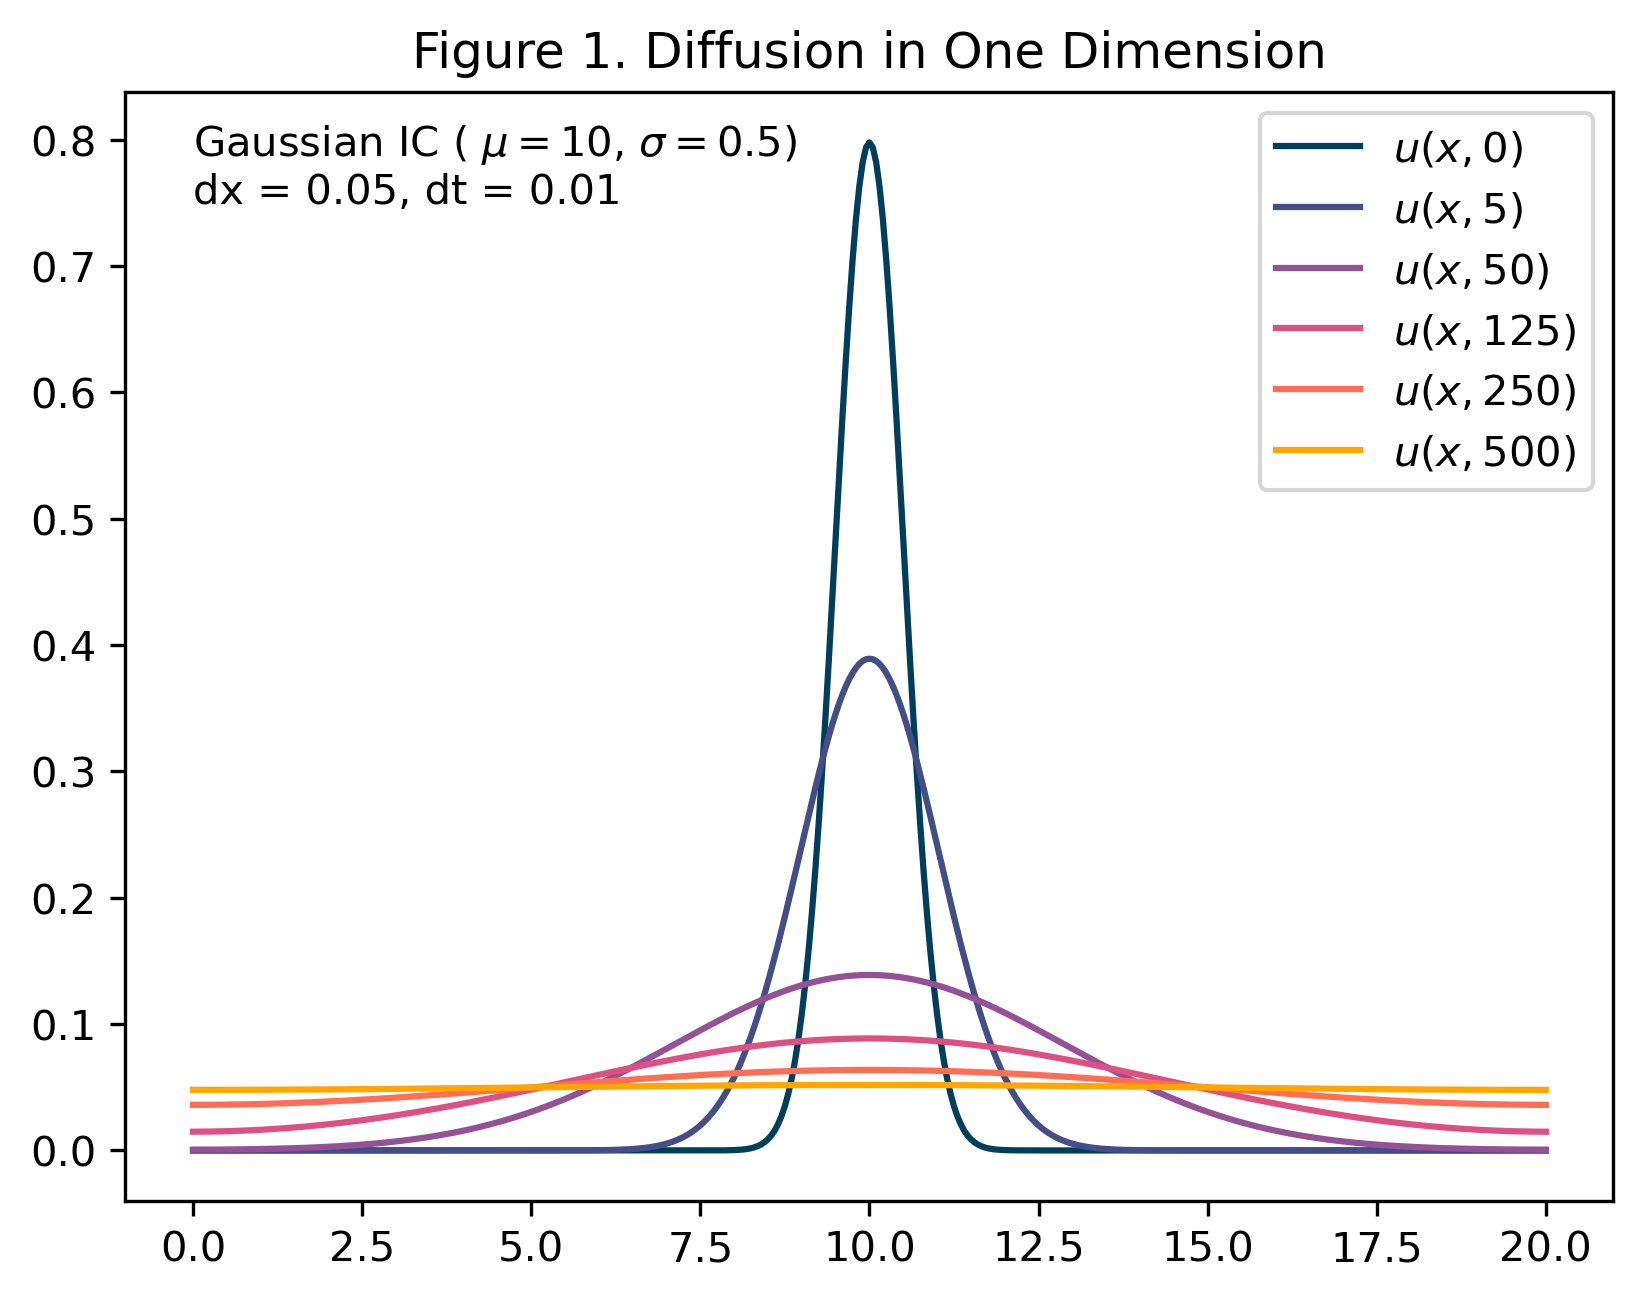

Area under u(x,0) = 1.0000000000000004
Area under u(x,100) = 0.9995508154016008
Area under u(x,200) = 0.9985210787796398
Area under u(x,300) = 0.9979724740159428
Area under u(x,400) = 0.9977189148875474
Area under u(x,500) = 0.9976031859309636


In [4]:
# Diffusion Plot
t0 = u[0][1]
t1 = u[int(0.01*Nt)][1]
t2 = u[int(0.1*Nt)][1]
t3 = u[int(0.25*Nt)][1]
t4 = u[int(0.5*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.figure()
plt.plot(Xs,t0, label = r'$u(x,0)$', color = "#003f5c" )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.01*T)})$', color = "#444e86")
plt.plot(Xs,t2, label = fr'$u(x,{int(0.1*T)})$', color = "#955196")
plt.plot(Xs,t3, label = fr'$u(x,{int(0.25*T)})$', color = "#dd5182")
plt.plot(Xs,t4, label = fr'$u(x,{int(0.5*T)})$', color = "#ff6e54")
plt.plot(Xs,t5, label =fr'$u(x,{int(T)})$', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(0,0.75,"Gaussian IC ( " + r'$\mu = 10$' + ", " + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}")
plt.title("Figure 1. Diffusion in One Dimension")
plt.show()

# Integration function using the trapezoid method
def integrate(u,dx,x_vals):
    area_under_curve = 0
    for i in range(0,len(x_vals)-1):
        area = dx * (u[i+1]+u[i]) / 2
        area_under_curve = area_under_curve + area
    return area_under_curve

# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

<span style='font-family:"Computer Modern"'> 
<span style="line-height:200%"> 
    
&emsp;&emsp; Figure 1 shows numerical solutions of $u(x,t)$ generated by Equation 12 at $t = 5, t = 50, t = 125, t = 250,$ and $t = 500$ as well as the initial condition at $t = 0$. By $t = 300$, $u(x,t)$ appears to have flattened out which is expected when movement is only due to diffusive flux. However, calculations of the integral of $u(x,t)$ at $t = 5, t = 50, t = 125, t = 250,$ and $t = 500$ reveal a slight loss of area under the curve with each time step. As such, future work on this model should involve the implementation of numerical solutions to the diffusion equation that better conserve the area under the curve.

&emsp;&emsp; After developing a numerical solver for the diffusion equation in one dimension, my next step in replicating the findings of Moorcroft & Barnett 2008 is to develop a process for numerically solving the advection equation in one dimension. Details on the development of a numerical solution for the advection equation in one dimension are described in the following section.
      
# Numerical Solution for the Advection Equation in One Dimension

&emsp;&emsp; While Moorcroft & Barnett (2008) define advection speed based on the spatial distribution of resources, I will start with the simpler case of modeling advection with constant speed. 

## Advection with Constant Speed: First-Order Upwinding Approximation

&emsp;&emsp; The process used to construct a numerical solution for the advection equation with constant speed is highly similar to the process used to construct a numerical solution for the diffusion equation in the previous section. Following Chattot (2002), I start by discretizing my domain using a set of equally spaced mesh points in the same way that I did for the diffusion equation. Similarly, I then replace the derivatives in the advection equation using finite difference approximations. I continue to use a forward difference approximation for the time derivate (Equation 9) and instead of using a centered difference approximation like I did for the spatial derivative in the diffusion equation, I approximate the spatial derivative in the advection equation using an upwind approach (Chattot, 2002). Here, I use a first-order upwind approximation for the spatial derivative given by:

\begin{equation} \frac{\partial u}{\partial x} = \frac {u_{i,j} - u_{i-1,j}}{\Delta x} \; \; \text{if c > 0}\end{equation}

\begin{equation} \frac{\partial u}{\partial x} = \frac {u_{i+1,j} - u_{i,j}}{\Delta x} \; \; \text{if c < 0}\end{equation}
                                                                                                                     
&emsp;&emsp; Which substituting into the PDE along with the forward difference approximation of the time derivative yieds:

\begin{equation} \frac {u_{i,j+1} - u_{i,j}}{\Delta t} = -c \left(\frac {u_{i,j} - u_{i-1,j}}{\Delta x}\right) \; \; \text{if c > 0} \end{equation}

\begin{equation} \frac {u_{i,j+1} - u_{i,j}}{\Delta t} = -c \left(\frac {u_{i+1,j} - u_{i,j}}{\Delta x}\right) \; \; \text{if c < 0} \end{equation}

&emsp;&emsp; Finally, re-arranging terms produces the following finite difference scheme for the numerical solution of the advection equation in one dimension:

\begin{equation} u_{i,j+1} = u_{i,j} - \rho (u_{i,j} - u_{i-1,j}) \; \; \text{if c > 0}\end{equation}

\begin{equation} u_{i,j+1} = u_{i,j} - \rho (u_{i+1,j} - u_{i,j}) \; \; \text{if c < 0}\end{equation}

&emsp;&emsp; Where $\rho$, the Courant number, is given by:

$$\rho = c \left(\frac {\Delta t}{\Delta x}\right)$$

&emsp;&emsp; After defining a finite difference scheme for the numerical solution of the advection equation in one dimension, I then specify the bounds the spatial domain, the bounds of the time domain, $\Delta t$, $\Delta x$, and the velocity of the animal. Here, I set the bounds of the spatial domain to be $[0,50]$, the bounds of the time domain to be $[0,300]$, $\Delta t$ to be $0.01$, $\Delta x$ to be $0.05$, and velocity, $c$, to be $0.1$.

```python
# Bounds
start = 0 # start bound
stop = 50 # stop bound

# Model parameters
dt = 0.01 # delta t
dx = 0.05  # delta x
T = 300 # Total time
Nt = int(T / dt)  # Number of time steps
Nx = int((abs(stop-start))/dx)  # Number of x steps
c = 0.1 # advections speed
p = c * dt / dx /2 # courant number
```

&emsp;&emsp; Like the finite difference scheme for the diffusion equation described above, the stability of the finite difference scheme for the advection equation is sensitive to choices of various inputs. Specifically, the finite difference scheme for the advection equation is sensitive to certain choices for $\Delta t$, $\Delta x$, and $c$. In order to avoid numerical instability, the Courant number, $\rho$, must obey the Courant–Friedrichs–Lewy (CFL) condition (Chattot, 2002):

$$\rho = c \left(\frac {\Delta t}{\Delta x}\right) < 1$$

&emsp;&emsp; As such, I include a flag that generates a warning if the current values of $\Delta t$, $\Delta x$, and  $c$ will cause numerical instability.



```python
# CFL flag
if p > 1:
    print("WARNING: Courant number > 1")
```                                                                                                     

<span style='font-family:"Computer Modern"'> 
<span style="line-height:200%"> 
    
&emsp;&emsp; In an identical fashion to the diffusion example described in the previous section, the spatial and temporal domains are discretized using a numpy array with $N_t$ rows and $N_x$ columns. In each cell of the array, the spatial position, $x_i$, and the probability density at position $x_i$ and time $t_j$, $u(x_i,t_j)$, are stored. Additionally, I continue to use a Gaussian initial condition, this time with $\mu = 10$ and $\sigma = 0.6$                                                                                                     

&emsp;&emsp; After discretizing the domains and specifying the initial conditions, I then numerically solve for $u(x,t)$ at future time-setps using the finite difference scheme described by Equations 9 and 10. Again, I am using periodic boundary conditions.                                                                    
                                                                                                     
```python    
# First-order upwind scheme
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if i == 0:
            u[j+1][1][i] = u[j][1][i] - p * (u[j][1][i] - u[j][1][-1])
        else:
            u[j + 1][1][i] = u[j][1][i] - p * (u[j][1][i] - u[j][1][i - 1])
```    

In [5]:
#Advection First Order Upwinding with Constant Speed

# Bounds
start = 0 # start bound
stop = 50 # stop bound

# Model parameters
dt = 0.01 # delta t
dx = 0.05  # delta x
T = 300 # Total time
Nt = int(T / dt)  # Number of time steps
Nx = int((abs(stop-start))/dx)  # Number of x steps
c = 0.1 # advections speed
p = c * dt / dx /2 # courant number

# CFL flag
if p > 1:
    print("WARNING: Courant number > 1")

# Initializing x values where u(x,t) will be calculated
Xs = np.arange(start, stop + dx, dx)

# Initializing array with Nt, Nx columns, and [x,u(x,t)] per cell
u = np.zeros((Nt, 2, len(Xs)))

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

# Specifing inital condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                   mu = 10,
                   sigma = 0.6) 
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC 

# First-order upwinding scheme
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if i == 0:
            u[j+1][1][i] = u[j][1][i] - p * (u[j][1][i] - u[j][1][-1])
        else:
            u[j + 1][1][i] = u[j][1][i] - p * (u[j][1][i] - u[j][1][i - 1])



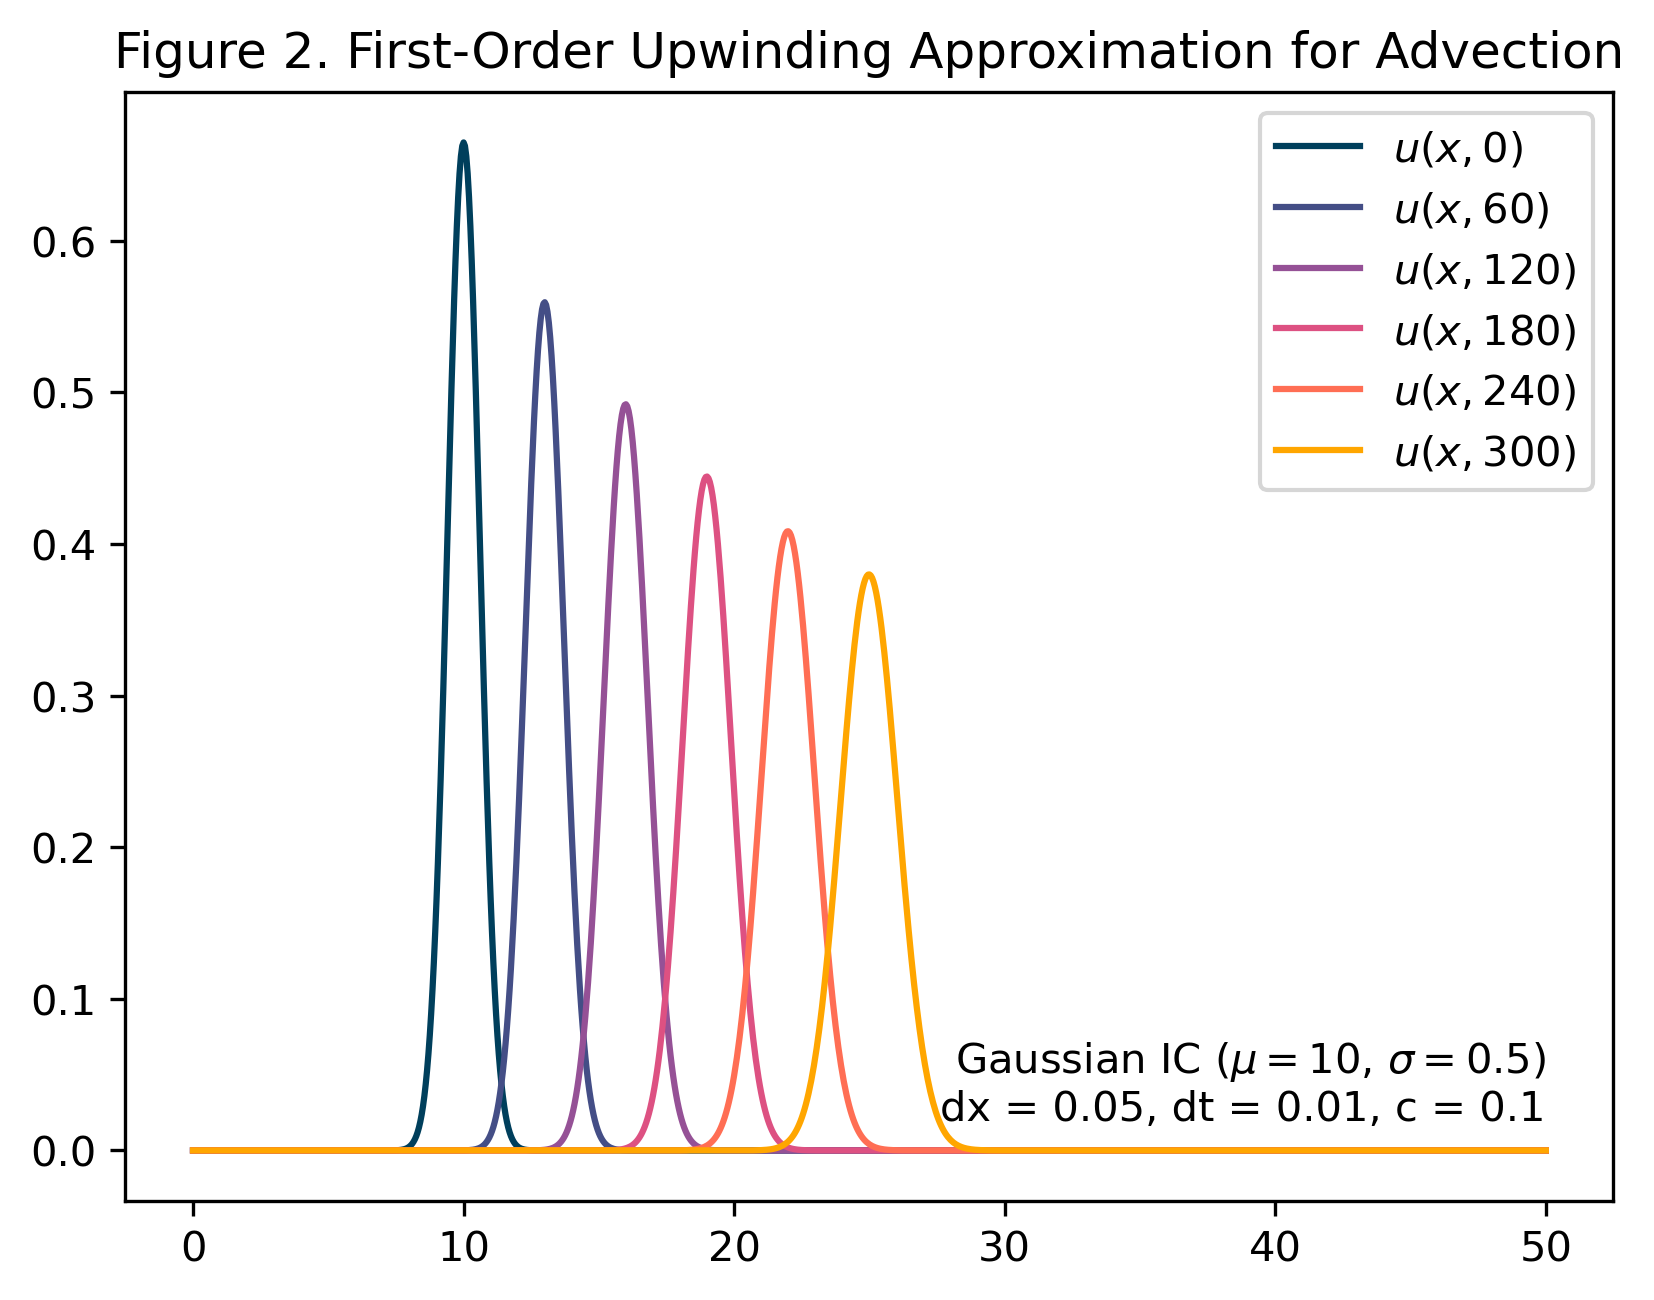

Area under u(x,0) = 0.9999999999999998
Area under u(x,60) = 1.0
Area under u(x,120) = 1.0
Area under u(x,180) = 1.0
Area under u(x,240) = 1.0000000000000002
Area under u(x,300) = 1.0000000000000002


In [6]:
# First-order upwinding scheme advection plot
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.figure()
plt.plot(Xs,t0, label = r'$u(x,0)$', color = "#003f5c" )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.2*T)})$', color = "#444e86")
plt.plot(Xs,t2, label = fr'$u(x,{int(0.4*T)})$', color = "#955196")
plt.plot(Xs,t3, label = fr'$u(x,{int(0.6*T)})$', color = "#dd5182")
plt.plot(Xs,t4, label = fr'$u(x,{int(0.8*T)})$', color = "#ff6e54")
plt.plot(Xs,t5, label =fr'$u(x,{int(T)})$', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(50,0.02,"Gaussian IC (" + r'$\mu = 10$' + ", " + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}, c = {c}", ha = 'right')
plt.title("Figure 2. First-Order Upwinding Approximation for Advection")
plt.show()

# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

<span style='font-family:"Computer Modern"'> 
<span style="line-height:200%"> 
&emsp;&emsp; Figure 2 illustrates numerical solutions of $u(x,t)$ generated by Equation 4 at $t = 60, t = 120, t = 180, t = 240,$ and $t = 300$ as well as the initial condition at $t = 0$. Although the area under the curve is conserved as the PDF evolves over time, the PDF exhibits some concerning behaviors that do not follow what is predicted by the analytical solution of the simple advection equation. The simple advection equation is given by:
    $$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$
&emsp;&emsp; And its solution is:
    $$\phi (x-ct)$$

&emsp;&emsp; According to the simple advection equation, if $c$ is constant, the solution at future time steps is the profile of the initial condition shifted by $ct$ units in space. However, as can be seen in Figure 2, the numerical solution presented in Equations 18 and 19 does not exhibit the same behavior as the analytical solution of the simple advection equation. Specifically, the initial profile does not maintain the same shape as $t$ increases nor does the profile at future time-steps move left to right by $ct$ units. In an attempt to achieve greater compliance with the analytical solution of the simple advection equation, I will now try replacing the first-order upwind approximation for the spatial derivative with a second-order upwind approximation.

## Advection with Constant Speed: Second-Order Upwind Approximation
    
&emsp;&emsp; According to Shyy (1985), finite difference schemes employing a second-order upwind approximation preform better than those relying on a first-order upwind approximation. Keeping with Shyy (1985), a second-order upwind approximation of the spatial derivative may be defined by:
    
\begin{equation} \frac{\partial u}{\partial x} = \frac {3u_{i,j} - 4u_{i-1,j} + u_{i-2,j}}{2 \Delta x} \; \; \text{if c > 0}\end{equation}

\begin{equation} \frac{\partial u}{\partial x} = \frac {-u_{i+2,j} + 4u_{i+1,j} -3u_{i,j}}{2 \Delta x} \; \; \text{if c < 0}\end{equation}
                                                                                                                       
&emsp;&emsp; Substituting Equations 20 and 21 along with Equation 9 into the simple advection equation yields:
                                                                                                                       \begin{equation} u_{i,j+1} = u_{i,j} - \rho (3u_{i,j} - 4u_{i-1,j} + u_{i-2,j}) \; \; \text{if c > 0}\end{equation}

\begin{equation} u_{i,j+1} = u_{i,j} - \rho (-u_{i+2,j} + 4u_{i+1,j} -3u_{i,j}) \; \; \text{if c < 0}\end{equation}   
                                                                                                                   
&emsp;&emsp; Where the Courant number $\rho$ is now given by:

$$\rho = c \left(\frac {\Delta t}{2 \Delta x}\right)$$                                                                 
                                                                                                                   
&emsp;&emsp; Equations 22 and 23 can be implemented in Python with period boundary conditions via the following code:

```python                                                                                                           
# Second-order upwinding approach
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][Nx] 
                                       + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] 
                                       + u[j][1][Nx]) + u[j][1][i]
            else:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][i-1] 
                                       + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] 
                                                   - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] 
                                                   - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] 
                                                   - 3 * u[j][1][i])
```                                                                                                    

In [7]:
### Second-Order Upwinding Approach

# Second-order upwinding approach
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            else:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i])



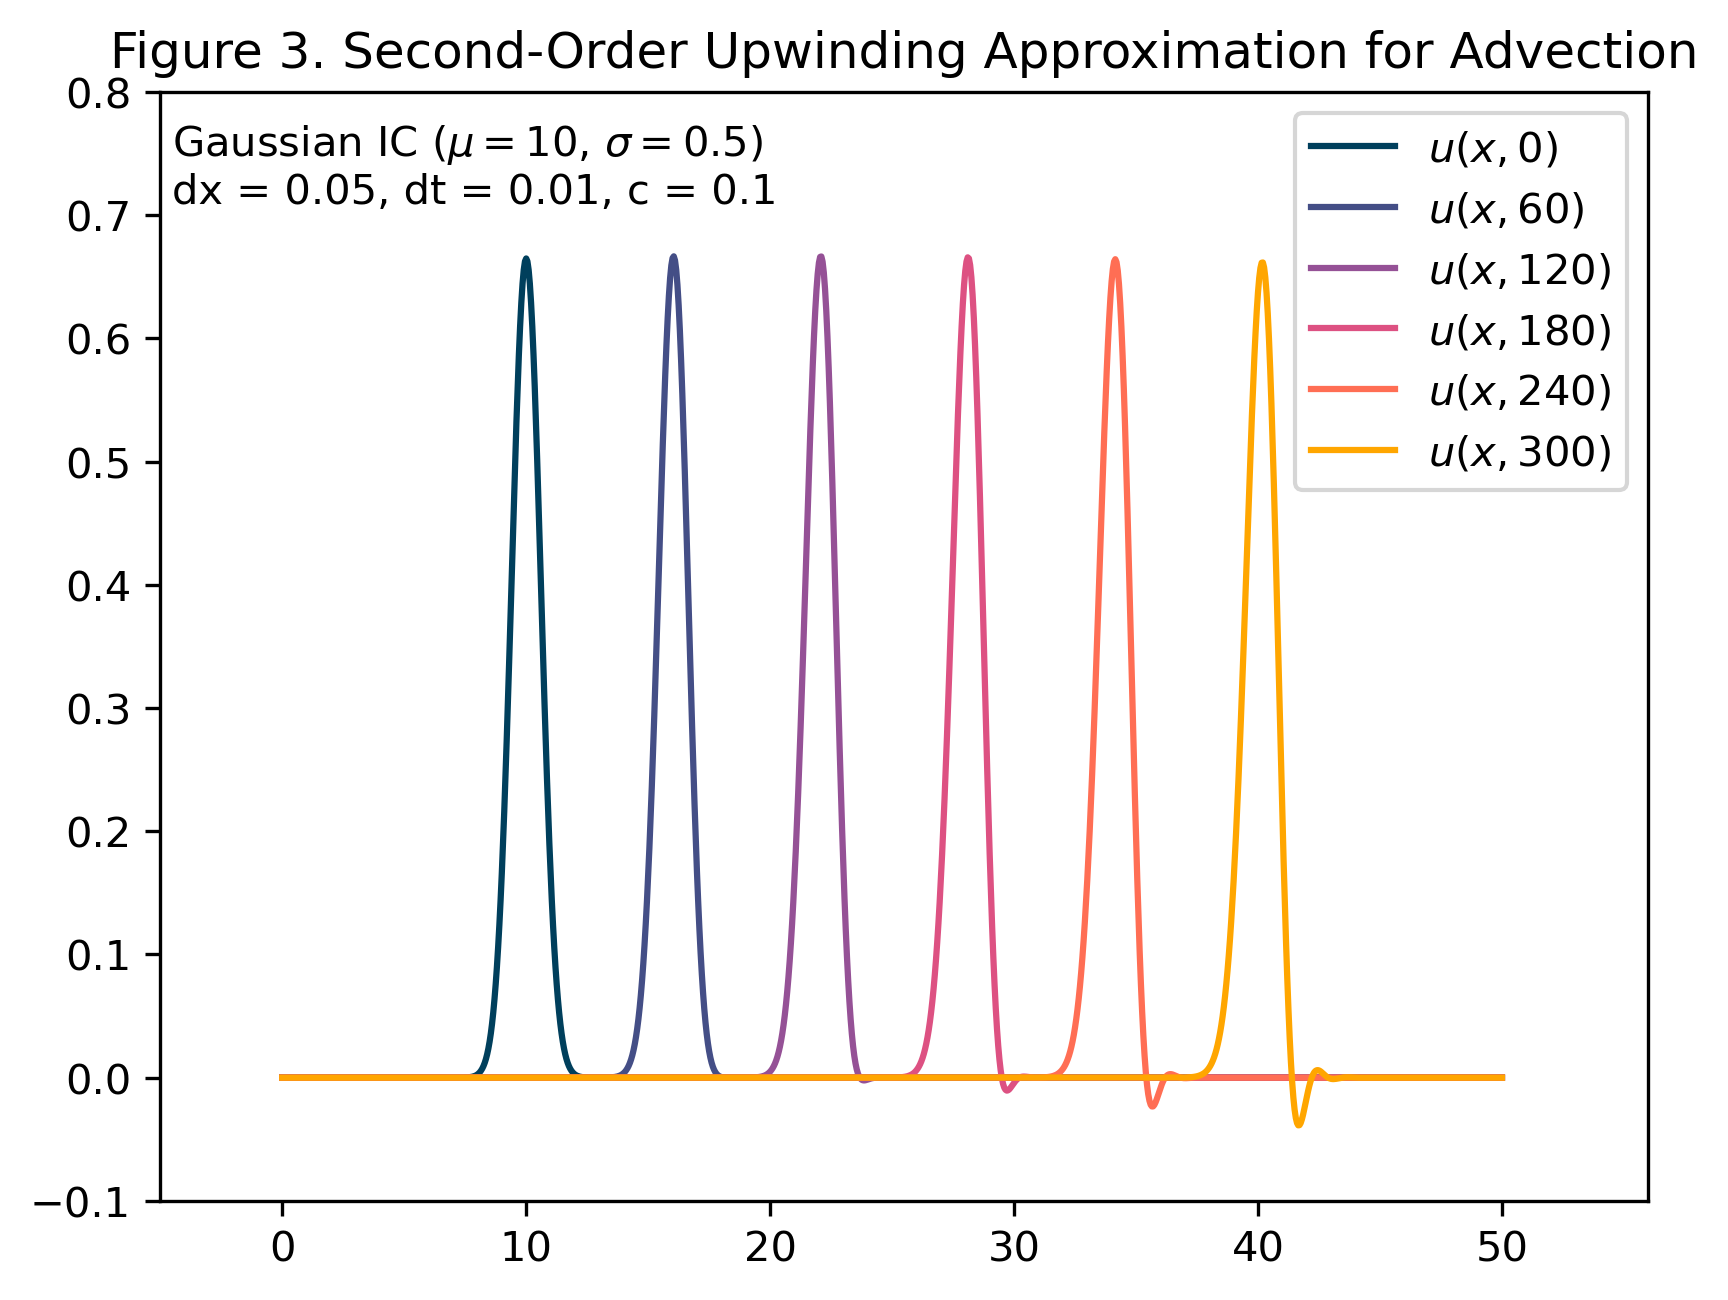

Area under u(x,0) = 0.9999999999999998
Area under u(x,60) = 0.9999999999999993
Area under u(x,120) = 1.0000000000000002
Area under u(x,180) = 1.0000000000000013
Area under u(x,240) = 1.0000000000000002
Area under u(x,300) = 0.9999999999999998


In [8]:
# Second-order upwinding scheme advection plot
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.figure()
plt.plot(Xs,t0, label = r'$u(x,0)$', color = "#003f5c" )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.2*T)})$', color = "#444e86")
plt.plot(Xs,t2, label = fr'$u(x,{int(0.4*T)})$', color = "#955196")
plt.plot(Xs,t3, label = fr'$u(x,{int(0.6*T)})$', color = "#dd5182")
plt.plot(Xs,t4, label = fr'$u(x,{int(0.8*T)})$', color = "#ff6e54")
plt.plot(Xs,t5, label =fr'$u(x,{int(T)})$', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(-4.5,0.71,"Gaussian IC (" + r'$\mu = 10$' + 
         ", " + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}, c = {c}", ha = 'left')
plt.title("Figure 3. Second-Order Upwinding Approximation for Advection")
plt.xlim([-5,56])
plt.ylim([-0.1,0.8])
plt.show()
# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

<span style='font-family:"Computer Modern"'> 
<span style="line-height:200%"> 

&emsp;&emsp; A comparison of Figure 2 with Figure 3 supports the finding in Shyy (1985) that second-order upwinding more accurately approximates the spatial derivative than first order upwinding. In Figure 2, a first-order upwind approximation of the spatial derivaitve did not result in the initial density profile shifting by $ct$ units during each progressive time-step. However, the use of a second-order upwind approximation in Figure 3 caused the initial density profile to shift by $ct$ units as $t$ increased. Furthermore, the shape of the initial density profile is conserved at future time-steps in Figure 3, while the initial density profile changed shape in Figure 2. Be that as it may, the second-order upwind approximation generated some numerical instability which is visible in Figure 3 starting at $t = 120$. Ideally, a more numerically stable method of solving the simple advection equation should be used. However given the time constraints of this project, a second-order upwind approximation was the best scheme that I was able to implement for numerically solving the advection equation.

## Advection with Variable Speed
    
&emsp;&emsp; Now that I have identified a finite difference scheme for modeling advection with constant speed, I will now move on to tackling the more biologically relevant problem of modeling advection with variable speed. Adhering to Moorcroft & Barnett (2008), the advection coefficient should now take the form of Equation 4 above. Assuming $\Delta t$ is sufficiently small, we may drop $\lim_{\tau \to 0}$ in Equation 4 and express $c(x)$ simply as:
    
\begin{equation} c(x) = \frac{M_2(\tau)}{\tau} \frac{w_x (x)}{w(x)} \end{equation}

&emsp;&emsp; Because the the value of the advection coefficient varies spatially with the habitat preference function $w(x)$, $c(x)$ must be calculated at every value $x_i$ in the spatial domain. Using a forward difference approximation for the time derivative and a second-order upwind approximation for the spatial derivative, a finite difference scheme for advection with variable speed may be written as:

\begin{equation} u_{i,j+1} = u_{i,j} - \frac{M_2(\tau)}{\tau} \frac{w_x (x_i)}{w(x_i)}\left(\frac{\Delta t}{2 \Delta x}\right) (3u_{i,j} - 4u_{i-1,j} + u_{i-2,j}) \; \; \text{if c > 0}\end{equation}

\begin{equation} u_{i,j+1} = u_{i,j} - \frac{M_2(\tau)}{\tau} \frac{w_x (x_i)}{w(x_i)}\left(\frac{\Delta t}{2 \Delta x}\right) (-u_{i+2,j} + 4u_{i+1,j} -3u_{i,j}) \; \; \text{if c < 0}\end{equation}   
                                                                                                                   
&emsp;&emsp; Where $- \frac{M_2(\tau)}{\tau} \frac{w_x (x_i)}{w(x_i)}\left(\frac{\Delta t}{2 \Delta x}\right)$ is equal to the Courant number $\rho$ at $x_i$.

&emsp;&emsp; As a first example, I will consider a habitat preference function of the form: 
    
\begin{equation} w(x) = 0.1 + \sin^2\left({\frac{2\pi x}{50}}\right) \end{equation}

&emsp;&emsp; With spatial derivative:
    
\begin{equation} w_x (x) = \frac{2\pi}{25}\cos\left(\frac{\pi x}{25}\right)\sin\left(\frac{\pi x}{25}\right) \end{equation}
    
&emsp;&emsp; In order to incorporate Equations 27 and 28 into the finite difference scheme described by Equations 25 and 26, I must first calculate the values of $w(x)$ and $w_x(x)$ at every value $x_i$ in my domain. This may be accomplished using the following Python code:
    
```python
# Habitat Preference Function
def preference(x):
    pi = math.pi
    res = 0.1 + math.sin(2 * pi * x / 50) ** 2 
    return res

# Derivative of Habitat Preference Function
def preference_slope(x):
    pi = math.pi
    res = (2 * pi / 25) * math.cos(pi * x / 25) * math.sin(pi * x / 25)
    return res

# Calculating habitat preference at x_i
w = np.zeros((1,2,len(Xs)))
w[0][0] = Xs
for i in range(0,len(Xs)):
    w[0][1][i] = preference(w[0][0][i])

# Calculating derivative of habitat preference at x_i
wx = np.zeros((1,2,len(Xs)))
wx[0][0] = Xs
for i in range(0,len(Xs)):
    wx[0][1][i] = preference_slope(w[0][0][i])
```
&emsp;&emsp; After calculating $w(x)$ and $w_x(x)$ for every value $x_i$ in my domain, I can now model advection with variable speed using the finite difference scheme described in Equations 25 and 26:

```python
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = u[j][1][i] -p * (3*u[j][1][i] - 4 * u[j][1][Nx] 
                                                  + u[j][1][Nx-1])
            elif i == 1:
                u[j + 1][1][i] = u[j][1][i] -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] 
                                                  + u[j][1][Nx])
            else:
                u[j + 1][1][i] = u[j][1][i] -p * (3*u[j][1][i] - 4 * u[j][1][i-1] 
                                                  + u[j][1][i-2]) 
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] 
                                                   - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] 
                                                   - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] 
                                                   - 3 * u[j][1][i])
```

In [9]:
# Habitat Preference
def preference(x):
    pi = math.pi
    res = 0.1 + math.sin(2 * pi * x / 50) ** 2 
    return res

# Derivative of Habitat Preference Function
def preference_slope(x):
    pi = math.pi
    res = (2 * pi / 25) * math.cos(pi * x / 25) * math.sin(pi * x / 25)
    return res

#Habitat Preference Function
w = np.zeros((1,2,len(Xs)))
w[0][0] = Xs
for i in range(0,len(Xs)):
    w[0][1][i] = preference(w[0][0][i])

#Spatial Derivative of Habitat Preference Function
wx = np.zeros((1,2,len(Xs)))
wx[0][0] = Xs
for i in range(0,len(Xs)):
    wx[0][1][i] = preference_slope(w[0][0][i])

# Specifing inital condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                   mu = 23,
                   sigma = 0.6) 
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC 

for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            else:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i])



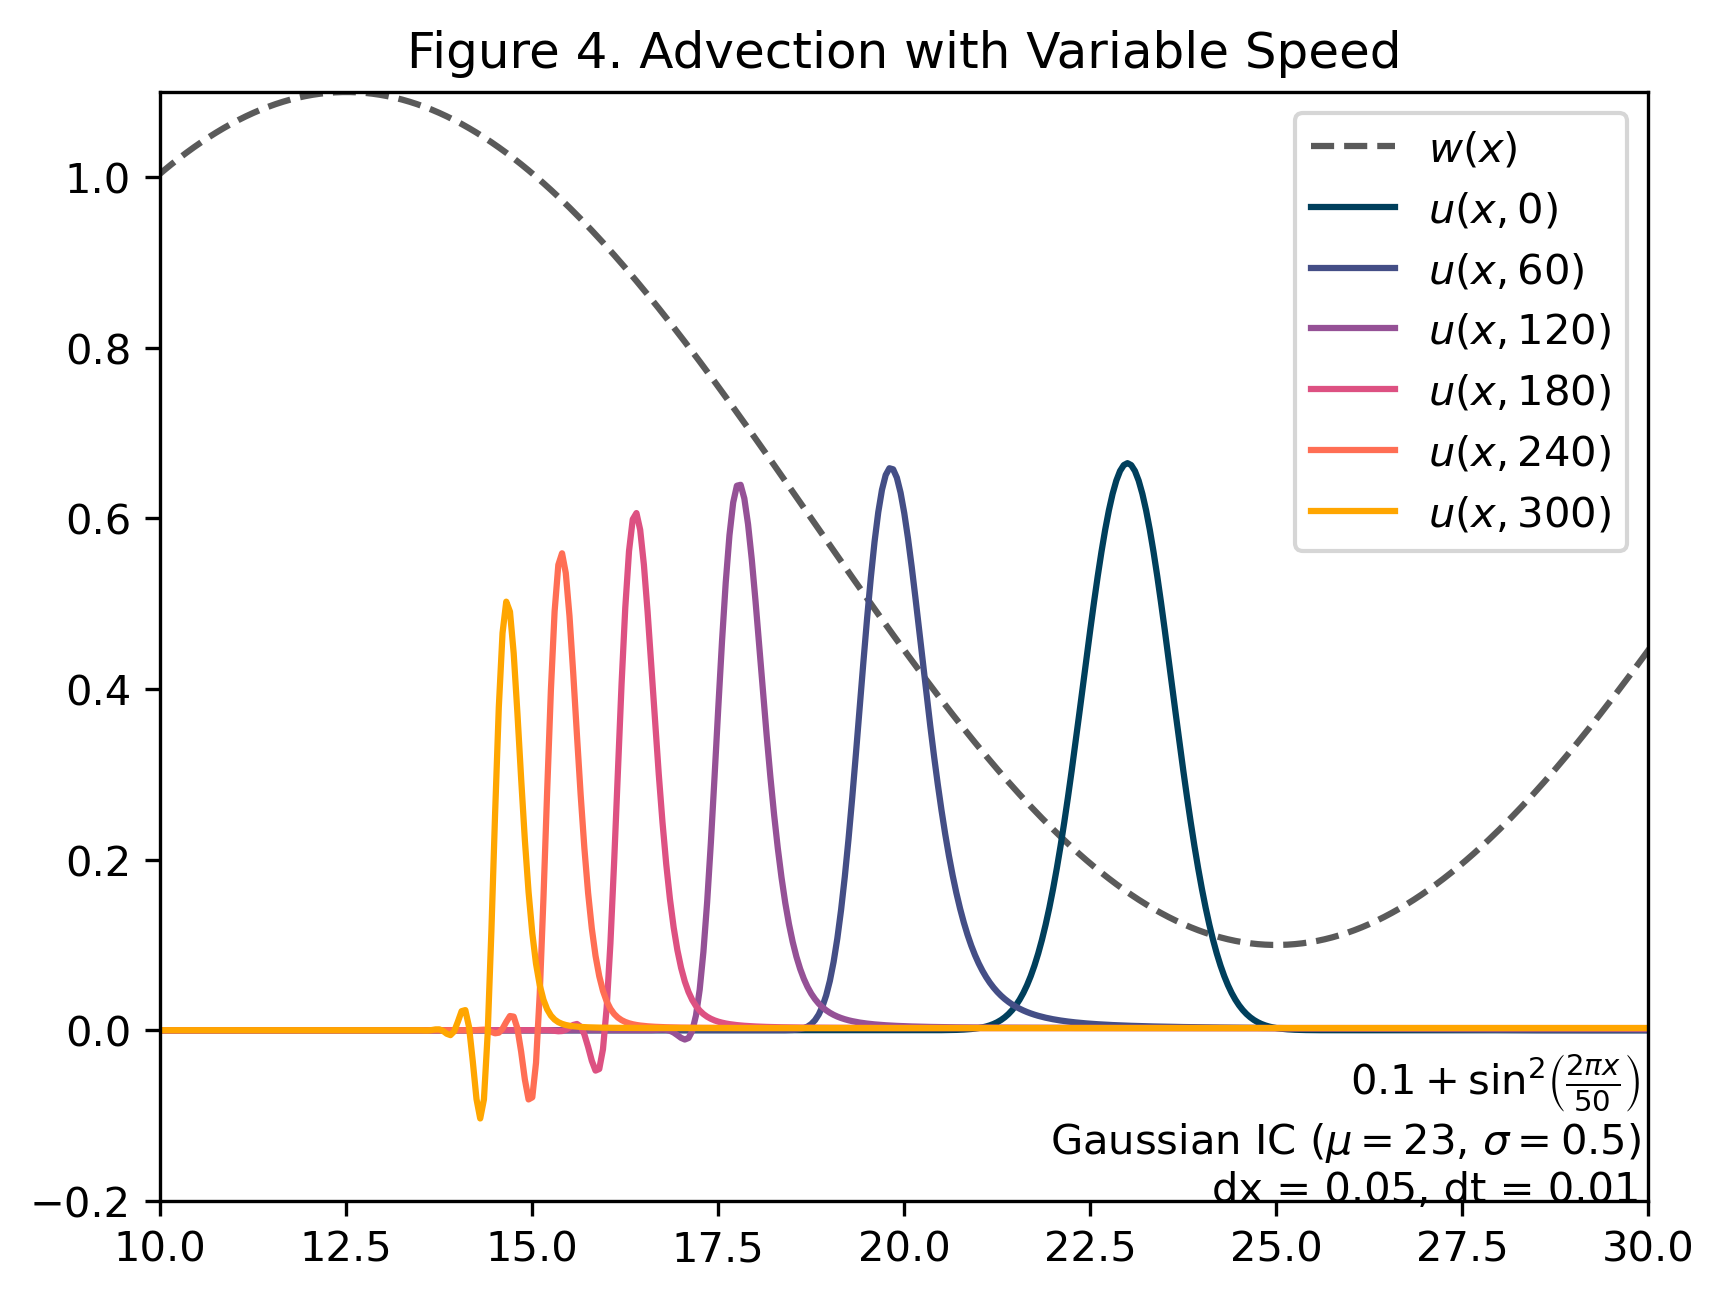

Area under u(x,0) = 1.0000000000000002
Area under u(x,60) = 0.7792795317052899
Area under u(x,120) = 0.5287335829487156
Area under u(x,180) = 0.38943306821815143
Area under u(x,240) = 0.3007411616552028
Area under u(x,300) = 0.23959897942307748


In [10]:
# Advection with variable speed
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.figure
plt.plot(Xs,w[0][1], color = "#5a5a5a", label = fr"$w(x)$", linestyle = "dashed")
plt.plot(Xs,t0, label = fr'$u(x,0)$', color = "#003f5c" )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.2*T)})$', color = "#444e86")
plt.plot(Xs,t2, label = fr'$u(x,{int(0.4*T)})$', color = "#955196")
plt.plot(Xs,t3, label = fr'$u(x,{int(0.6*T)})$', color = "#dd5182")
plt.plot(Xs,t4, label = fr'$u(x,{int(0.8*T)})$', color = "#ff6e54")
plt.plot(Xs,t5, label =fr'$u(x,{int(T)})$', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(29.9,-0.15,r"$0.1 + \sin^2\left({\frac{2\pi x}{50}}\right)$"+
         "\nGaussian IC (" + r'$\mu = 23$' + ", " + r'$\sigma = 0.5)$' + 
         f"\ndx = {dx}, dt = {dt}", ha = 'right')
plt.title("Figure 4. Advection with Variable Speed")
plt.xlim([10,30])
plt.ylim([-0.2,1.2])
plt.show()

# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

<span style='font-family:"Computer Modern"'> 
<span style="line-height:200%"> 

&emsp;&emsp; Figure 4 depicts the expected space use of an animal moving with variable speed according to the resource preference function given by Equation 27. As was foreseeable, the finite difference scheme defined in Equations 25 and 26 predicted that the animal would move away from its initial condition in an area of low resource preference to an area of high resource preference. However, the finite difference scheme in Equations 25 and 26 resulted in a loss of area under $u(x,t)$ as $t \longrightarrow \infty$. Additionally, this scheme generated numerical instability as $u(x,t)$ was calculated at increasing values of $t$. In the next section, I will attempt to modify the finite difference scheme in Equations 25 and 26 to better conserve the area under $u(x,t)$ and reduce numerical instability.

## Advection with Variable Speed (Modified Scheme)

&emsp;&emsp; In order to conserve the area under the curve as $u(x,t)$ is calculated at future time-steps, I will now modify the finite difference scheme depicted in Equations 25 and 26 by normalizing each value $u(x_i,t_j)$ by the area under $u(x,t_j)$:

\begin{equation} u_{i,j+1} = \frac{u_{i,j} - \rho (3u_{i,j} - 4u_{i-1,j} + u_{i-2,j})}{\int_{\Omega}{} u(x,t_{j+1})} \; \; \text{if c > 0}\end{equation}

\begin{equation} u_{i,j+1} = \frac{u_{i,j} - \rho (-u_{i+2,j} + 4u_{i+1,j} -3u_{i,j})}{\int_{\Omega}{} u(x,t_{j+1})} \; \; \text{if c < 0}\end{equation} 

&emsp;&emsp; Equations 29 and 30 may be implemented in Python using the following code:

```python
# Second-order upwind approximation with normalization by area under the curve
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = u[j][1][i] -p * (3*u[j][1][i] - 4 * u[j][1][Nx] 
                                                  + u[j][1][Nx-1])
            elif i == 1:
                u[j + 1][1][i] = u[j][1][i] -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] 
                                                  + u[j][1][Nx])
            else:
                u[j + 1][1][i] = u[j][1][i] -p * (3*u[j][1][i] - 4 * u[j][1][i-1] 
                     
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] 
                                                   - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] 
                                                   - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] 
                                                   - 3 * u[j][1][i])
    area = integrate(u = u[j + 1][1],
                     dx = dx,
                     x_vals = Xs)
    u[j+1][1] = u[j+1][1]/area

```

In [11]:
# Second-order upwinding approach with normalization by area under the curve
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            else:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i])
    area = integrate(u = u[j + 1][1],
                     dx = dx,
                     x_vals = Xs)
    u[j+1][1] = u[j+1][1]/area



Area under u(x,0) = 1.0000000000000002
Area under u(x,60) = 0.9999999999999989
Area under u(x,120) = 0.9999999999999992
Area under u(x,180) = 1.0000000000000002
Area under u(x,240) = 1.0000000000000009
Area under u(x,300) = 1.0000000000000002


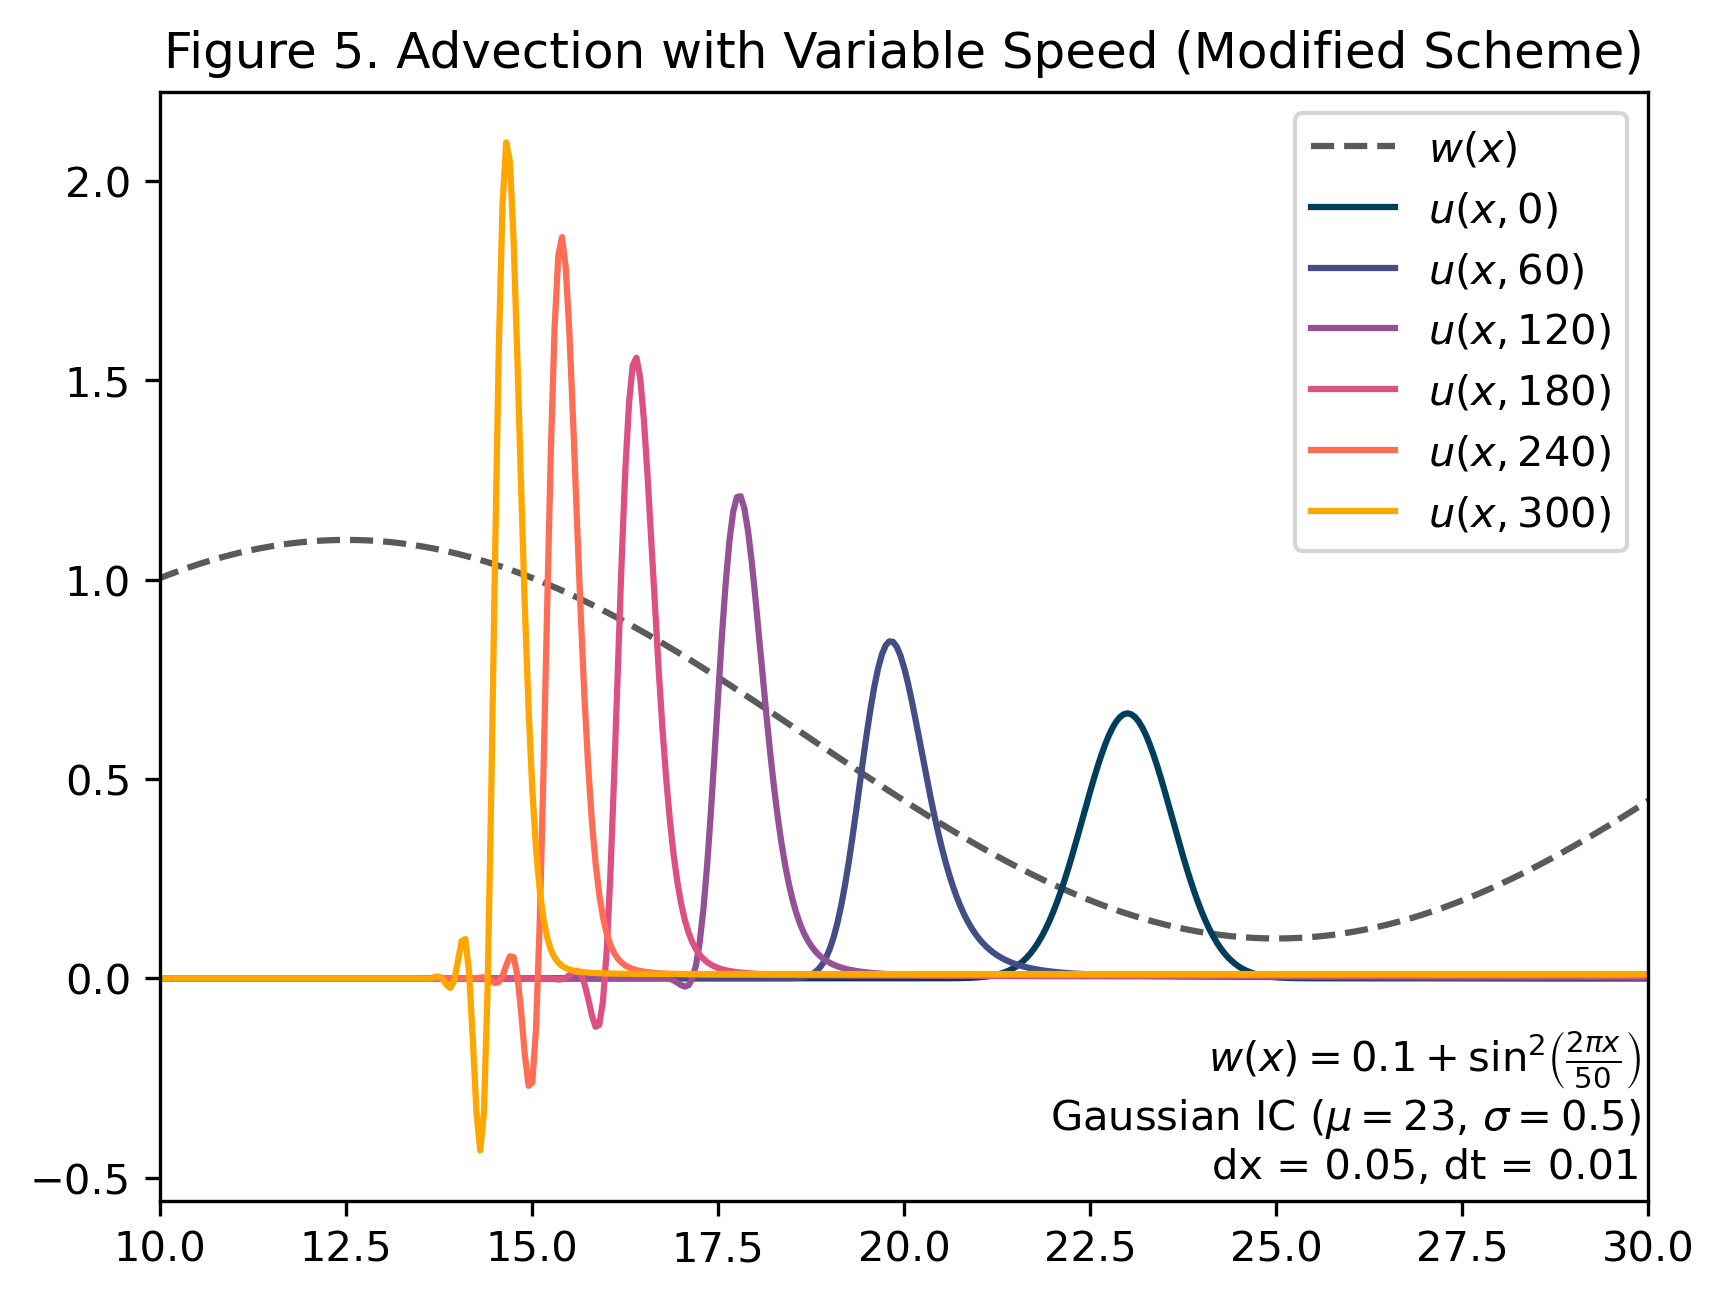

In [12]:
# Advection with variable speed
# Density is normalized by the area under the curve
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.figure()
plt.plot(Xs,w[0][1], color = "#5a5a5a", label = r"$w(x)$", linestyle = "dashed")
plt.plot(Xs,t0, label = fr'$u(x,0)$', color = "#003f5c" )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.2*T)})$', color = "#444e86")
plt.plot(Xs,t2, label = fr'$u(x,{int(0.4*T)})$', color = "#955196")
plt.plot(Xs,t3, label = fr'$u(x,{int(0.6*T)})$', color = "#dd5182")
plt.plot(Xs,t4, label = fr'$u(x,{int(0.8*T)})$', color = "#ff6e54")
plt.plot(Xs,t5, label =fr'$u(x,{int(T)})$', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(29.9,-0.5,r"$w(x) = 0.1 + \sin^2\left({\frac{2\pi x}{50}}\right)$" +"\nGaussian IC (" + r'$\mu = 23$' + ", "
         + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}", ha = 'right')
plt.title("Figure 5. Advection with Variable Speed (Modified Scheme)")
plt.xlim([10,30])
plt.show()

# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

<span style='font-family:"Computer Modern"'> 
<span style="line-height:200%"> 

&emsp;&emsp; Figure 5 depicts the results of the modified finite difference scheme for modeling advection with variable speed given by Equations 29 and 30. Like Equations 25 and 26, Equations 29 and 30 predict that the animal will move away from its initial condition in an area of low resource preference to an area of high resource preference. Unlike Equations 25 and 26 however, Equations 29 and 30 conserve the area under the curve as $u(x,t)$ is calculated at future time-steps. Despite conserving the area under the curve, Equations 29 and 30 do not ameliorate the numerical instability present in solutions generated by Equations 25 and 26. In fact, a comparison of Figure 4 and Figure 5 suggests that the numerical instability produced by Equations 29 and 30 is of a greater magnitude than the instability produced by Equations 25 and 26. While numerical solutions produced by Equations 29 and 30 are far from perfect, I will continue to model advection using the finite difference scheme in Equations 29 and 30 in the next section due to the time constraints of this project. 

# Numerical Solution for the Advection-Diffusion Equation in One Dimension

&emsp;&emsp; In the previous sections, I generated numerical solutions for diffusion and advection individually. Now, I will attempt to model advection and diffusion simultaneously, using the numerical solutions that I have already defined. Keeping with previous sections, I will solve for $u(x,t)$ at future time-steps using a forward difference approximation for the time derivative, a centered difference approximation for the spatial derivative of the diffusion term, and a second-order upwind approximation for the spatial derivative of the advection term. Substituting these approximations into the advection-diffusion equation and normalizing each value $u(x_i,t_j)$ by the area under $u(x,t_j)$ yields the following finite difference scheme:
    
\begin{equation} u_{i,j+1} = \frac{u_{i,j} + r(u_{i-1,j} - 2u_{i,j} + u_{i+1,j}) - \rho (3u_{i,j} - 4u_{i-1,j} + u_{i-2,j})}{\int_{\Omega}{} u(x,t_{j+1})} \; \; \text{if c > 0}\end{equation}

\begin{equation} u_{i,j+1} = \frac{u_{i,j} + r(u_{i-1,j} - 2u_{i,j} + u_{i+1,j}) - \rho (-u_{i+2,j} + 4u_{i+1,j} -3u_{i,j})}{\int_{\Omega}{} u(x,t_{j+1})} \; \; \text{if c < 0}\end{equation}
    
&emsp;&emsp; I will now show how the finite difference scheme in Equations 31 and 32 can be implemented in Python. As I did in the previous sections, I will start by defining the bounds of the spatial and temporal domains, $\Delta t$, $\Delta x$, and the the animal's mean step length.
    
```python
# Bounds
start = 0 # start bound
stop = 50 # stop bound

# Model parameters
dt = 0.01 # delta t
dx = 0.05  # delta x
T = 1000 # Total time
Nt = int(T / dt)  # Number of time steps
Nx = int((abs(stop-start))/dx)  # Number of x steps
mean_sl = 0.04 #mean step length
k = (mean_sl**2)/2/dt # diffusion coefficient equal to mean step length squared
r = k * dt / dx / dx  # Fourier number
```
&emsp;&emsp; Following the previous section, I will continue to use the habitat preference function introduced in Equation 27. Additionally, I will continue using a Gaussian initial condition; this time with $\mu = 28$ and $\sigma = 0.5$ With the model parameters, habitat preference function, and initial conditions now defined, I can solve for $u(x,t)$ at future time-steps using the finite difference scheme presented in Equations 31 and 32:

```python
# Finite difference scheme for advection and diffusion
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if p > 1: # CFL flag
            print("WARNING: Courant number > 1")
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx]) 
                -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1]) 
                -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            elif i == Nx:
                u[j + 1][1][i] = r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1]) 
                - p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][i - 2]) + u[j][1][i]
            else:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1]) 
                -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx]) 
                + r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1]) 
                + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
            elif i == 0:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i + 2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i]) 
                + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i]) 
                + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
    area = integrate(u = u[j + 1][1],
                     dx = dx,
                     x_vals = Xs)
    u[j+1][1] = u[j+1][1]/area
```

In [13]:
# Bounds
start = 0 # start bound
stop = 50 # stop bound

# Model parameters
dt = 0.01 # delta t
dx = 0.05  # delta x
T = 5000 # Total time
Nt = int(T / dt)  # Number of time steps
Nx = int((abs(stop-start))/dx)  # Number of x steps
mean_sl = 0.04 #mean step length
k = (mean_sl**2)/2/dt # diffusion coefficient equal to mean step length squared
r = k * dt / dx / dx  # Fourier number

# CFL flag
if r > 0.5:
    print("WARNING: Fourier number > 0.5")

# Initializing x values where u(x,t) will be calculated
Xs = np.arange(start, stop + dx, dx)

# Initializing array with Nt row, Nx columns, and [x,u(x,t)] per cell
u = np.zeros((Nt, 2, len(Xs)))

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

def preference(x):
    pi = math.pi
    res = 0.1 + math.sin(2 * pi * x / 50) ** 2
    res = np.float64(res)
    return res

# Derivative of Habitat Preference Function
def preference_slope(x):
    pi = math.pi
    res = (2 * pi / 25) * math.cos(pi * x / 25) * math.sin(pi * x / 25)
    res = np.float64(res)
    return res

#Habitat Preference Function
w = np.zeros((1,2,len(Xs)))
w[0][0] = Xs
for i in range(0,len(Xs)):
    w[0][1][i] = preference(w[0][0][i])

#Spatial Derivative of Habitat Preference Function
wx = np.zeros((1,2,len(Xs)))
wx[0][0] = Xs
for i in range(0,len(Xs)):
    wx[0][1][i] = preference_slope(w[0][0][i])

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

#Setting Initial Condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                   mu = 28,
                   sigma = 0.5) #Gaussin IC
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC #Populating initial condition in array u

# Finite difference scheme for advection and diffusion
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if p > 1: # CFL flag
            print("WARNING: Courant number > 1")
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx]) -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1]) -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            elif i == Nx:
                u[j + 1][1][i] = r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1]) - p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][i - 2]) + u[j][1][i]
            else:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1]) -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx]) + r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1]) + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
            elif i == 0:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i + 2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i]) + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i]) + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
    area = integrate(u = u[j + 1][1],
                     dx = dx,
                     x_vals = Xs)
    u[j+1][1] = u[j+1][1]/area

#Approximating the steady state space use
w0 = integrate(u = (w[0][1]**2),
               dx = dx,
               x_vals = Xs)
steady_state_u = np.zeros((1,2,len(Xs)))
steady_state_u[0][0] = Xs
steady_state_u[0][1] = (w[0][1]**2)/w0

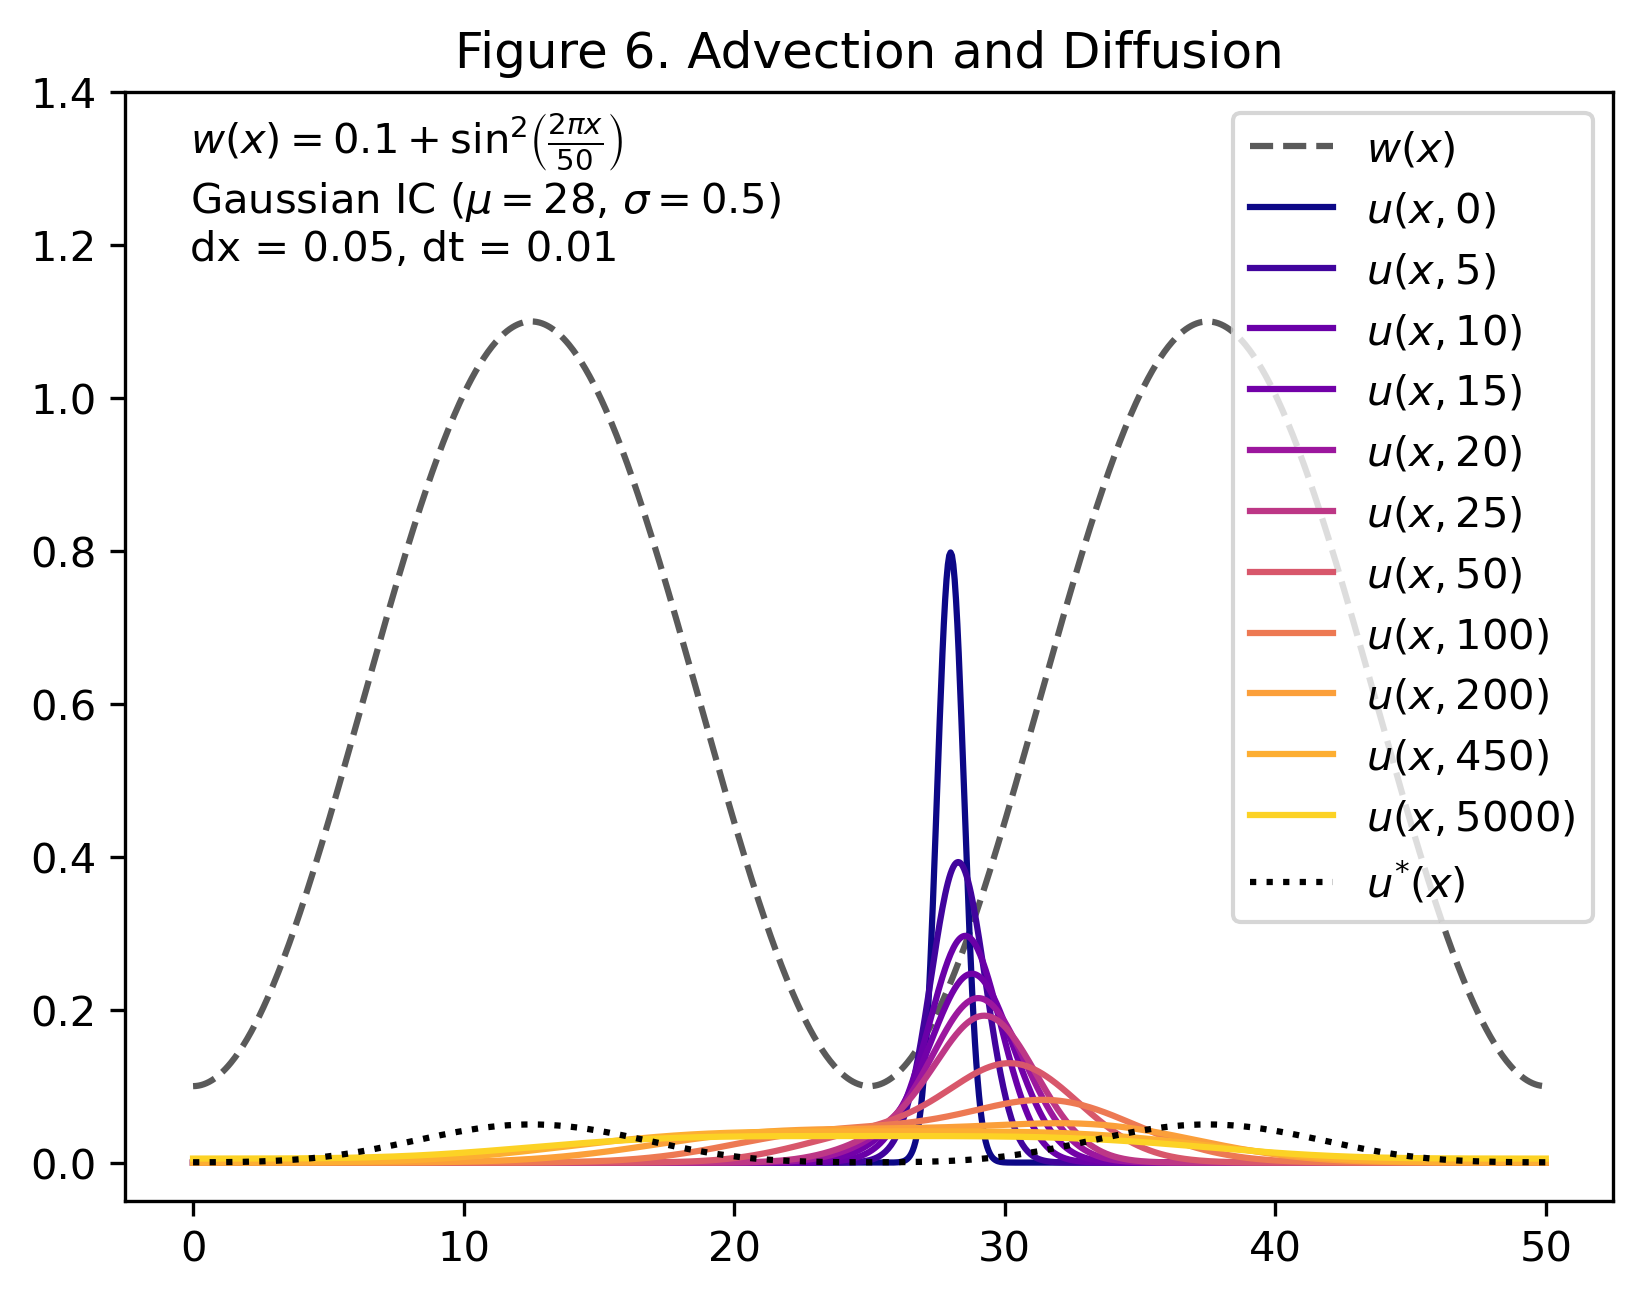

In [25]:
# Advection with variable speed
t0 = u[0][1]
t1 = u[int(0.001*Nt)][1]
t2 = u[int(0.002*Nt)][1]
t3 = u[int(0.003*Nt)][1]
t4 = u[int(0.004*Nt)][1]
t5 = u[int(0.005*Nt)][1]
t6 = u[int(0.01*Nt)][1]
t7 = u[int(0.02*Nt)][1]
t8 = u[int(0.04*Nt)][1]
t9 = u[int(0.09*Nt)][1]
t10 = u[-1][1]

clrs = ["#0d0887", "#41049d","#6a00a8", "#7201a8", "#9c179e", "#bd3786", "#d8576b", "#ed7953", "#fb9f3a", "#fdae32", "#fcd225"]

plt.figure()
plt.plot(Xs,w[0][1], color = "#5a5a5a", label = r"$w(x)$", linestyle = "dashed")
plt.plot(Xs,t0, label = r'$u(x,0)$', color = clrs[0] )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.001*T)})$', color = clrs[1])
plt.plot(Xs,t2, label = fr'$u(x,{int(0.002*T)})$', color = clrs[2])
plt.plot(Xs,t3, label = fr'$u(x,{int(0.003*T)})$', color = clrs[3])
plt.plot(Xs,t4, label = fr'$u(x,{int(0.004*T)})$', color = clrs[4])
plt.plot(Xs,t5, label = fr'$u(x,{int(0.005*T)})$', color = clrs[5])
plt.plot(Xs,t6, label = fr'$u(x,{int(0.01*T)})$', color = clrs[6])
plt.plot(Xs,t7, label = fr'$u(x,{int(0.02*T)})$', color = clrs[7])
plt.plot(Xs,t8, label = fr'$u(x,{int(0.04*T)})$', color = clrs[8])
plt.plot(Xs,t9, label = fr'$u(x,{int(0.09*T)})$', color = clrs[9])
plt.plot(Xs,t10, label =fr'$u(x,{int(T)})$', color = clrs[10])
plt.text(-0.1,1.18,r"$w(x) = 0.1 + \sin^2\left({\frac{2\pi x}{50}}\right)$" +"\nGaussian IC (" + r'$\mu = 28$' + ", "
         + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}", ha = 'left')
plt.ylim([-0.05,1.4])
plt.title("Figure 6. Advection and Diffusion")
plt.plot(Xs,steady_state_u[0][1], color = 'black', linestyle = 'dotted', label = r"$u^{*}(x)$")
plt.legend(loc="upper right")
plt.show()

<span style='font-family:"Computer Modern"'> 
<span style="line-height:200%"> 
    
&emsp;&emsp; Figure 6 depicts numerical solutions generated by the finite difference scheme given by Equations 31 and 32. An animation of Figure 6 is also included as an email attachment in the submission of the final report (see Figure6.mp4). Note, that Figure 6 also shows an analytical approximation of the expected steady-state pattern of space use $u^*(x)$ that was generated using the methods in Moorcroft & Barnett (2008) (see Equation 8). Interestingly, the numerical instability produced by the second-order upwind approximation that was visible in Figures 5 and 6 appears to have disappeared when advection and diffusion are modeled together. Furthermore, as expected when movement is due in part to diffusion, the PDF flattens out over time. Additionally, during the earlier time-steps, the initial PDF appears to shift from from an area of low resource preference to an area of high resource preference which is expected when movement is due in part to advection.  
    
&emsp;&emsp; During the later time-steps however, the evolution of the PDF that is predicted by my numerical solution deviates from the expected steady-state pattern of space given by Equation 8. Instead of concentrating in the two areas of high resource preference, as predicted by $u^*(x)$, the PDF continues to flatten out as $t \longrightarrow 
\infty$. In Figure 6, I ran the simulation out to $t=5000$, but to generate Figure6.mp4 (see email attachment) I ran the simulation out to $t=10000$. Running the simulation out to $t=10000$ in Figure6.mp4 did not change the final result very much; thus, suggesting that the expected steady state pattern of space use predicted by the numerical solution is approximately represented by $u(x,5000)$ in Figure 6. Regardless, it is clear that the numerical solution is not behaving as expected by Equation 8.

&emsp;&emsp; After modeling advection and diffusion using a resource preference function in the form of Equation 27, where resources are concentrated in two areas, I decided to investigate the expected pattern of animal space use in a landscape where the resources are concentrated in one area in the the center of the domain. For this purpose, I adopted a new resource preference function:

\begin{equation} w(x) = e^{-0.01|x-50|^2}\end{equation}

With spatial derivative:

\begin{equation} w_x (x) = -0.02 e^{-0.01|x-50|^2}\left(x-50\right) \end{equation}
    


In [ ]:
# Bounds
start = 0 # start bound
stop = 100 # stop bound

# Model parameters
dt = 0.01 # delta t
dx = 0.05  # delta x
T = 10000 # Total time
Nt = int(T / dt)  # Number of time steps
Nx = int((abs(stop-start))/dx)  # Number of x steps
mean_sl = 0.04 #mean step length
k = (mean_sl**2)/2/dt # diffusion coefficient equal to mean step length squared
r = k * dt / dx / dx  # Fourier number

# CFL flag
if r > 0.5:
    print("WARNING: Fourier number > 0.5")

# Initializing x values where u(x,t) will be calculated
Xs = np.arange(start, stop + dx, dx)

# Initializing array with Nt row, Nx columns, and [x,u(x,t)] per cell
u = np.zeros((Nt, 2, len(Xs)))

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

def preference(x):
    pi = math.pi
    res = math.exp(-0.01*abs(x-50)**2)  
    res = np.float64(res)
    return res

# Derivative of Habitat Preference Function
def preference_slope(x):
    pi = math.pi
    res = -0.02*math.exp(-0.01*(x-50)**2)*(x-50) 
    res = np.float64(res)
    return res

#Habitat Preference Function
w = np.zeros((1,2,len(Xs)))
w[0][0] = Xs
for i in range(0,len(Xs)):
    w[0][1][i] = preference(w[0][0][i])

#Spatial Derivative of Habitat Preference Function
wx = np.zeros((1,2,len(Xs)))
wx[0][0] = Xs
for i in range(0,len(Xs)):
    wx[0][1][i] = preference_slope(w[0][0][i])

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

#Setting Initial Condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                   mu = 10,
                   sigma = 0.5) #Gaussin IC
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC #Populating initial condition in array u

# Finite difference scheme for advection and diffusion
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if p > 1: # CFL flag
            print("WARNING: Courant number > 1")
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx]) -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1]) -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            elif i == Nx:
                u[j + 1][1][i] = r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1]) - p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][i - 2]) + u[j][1][i]
            else:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1]) -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx]) + r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1]) + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
            elif i == 0:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i + 2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i]) + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i]) + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
    area = integrate(u = u[j + 1][1],
                     dx = dx,
                     x_vals = Xs)
    u[j+1][1] = u[j+1][1]/area

#Approximating the steady state space use
w0 = integrate(u = (w[0][1]**2),
               dx = dx,
               x_vals = Xs)
steady_state_u = np.zeros((1,2,len(Xs)))
steady_state_u[0][0] = Xs
steady_state_u[0][1] = (w[0][1]**2)/w0

In [ ]:
# Advection with variable speed
t0 = u[0][1]
t1 = u[int(0.001*Nt)][1]
t2 = u[int(0.002*Nt)][1]
t3 = u[int(0.003*Nt)][1]
t4 = u[int(0.004*Nt)][1]
t5 = u[int(0.005*Nt)][1]
t6 = u[int(0.01*Nt)][1]
t7 = u[int(0.02*Nt)][1]
t8 = u[int(0.04*Nt)][1]
t9 = u[int(0.09*Nt)][1]
t10 = u[-1][1]

clrs = ["#0d0887", "#41049d","#6a00a8", "#7201a8", "#9c179e", "#bd3786", "#d8576b", "#ed7953", "#fb9f3a", "#fdae32", "#fcd225"]

plt.figure()
plt.plot(Xs,w[0][1], color = "#5a5a5a", label = r"$w(x)$", linestyle = "dashed")
plt.plot(Xs,t0, label = r'$u(x,0)$', color = clrs[0] )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.001*T)})$', color = clrs[1])
plt.plot(Xs,t2, label = fr'$u(x,{int(0.002*T)})$', color = clrs[2])
plt.plot(Xs,t3, label = fr'$u(x,{int(0.003*T)})$', color = clrs[3])
plt.plot(Xs,t4, label = fr'$u(x,{int(0.004*T)})$', color = clrs[4])
plt.plot(Xs,t5, label = fr'$u(x,{int(0.005*T)})$', color = clrs[5])
plt.plot(Xs,t6, label = fr'$u(x,{int(0.01*T)})$', color = clrs[6])
plt.plot(Xs,t7, label = fr'$u(x,{int(0.02*T)})$', color = clrs[7])
plt.plot(Xs,t8, label = fr'$u(x,{int(0.04*T)})$', color = clrs[8])
plt.plot(Xs,t9, label = fr'$u(x,{int(0.09*T)})$', color = clrs[9])
plt.plot(Xs,t10, label =fr'$u(x,{int(T)})$', color = clrs[10])
plt.text(-0.1,1.18,r"$w(x) = e^{-0.01|x-50|^2}$" +"\nGaussian IC (" + r'$\mu = 10$' + ", "
         + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}", ha = 'left')
plt.ylim([-0.05,1.4])
plt.title("Figure 7. Advection and Diffusion")
plt.plot(Xs,steady_state_u[0][1], color = 'black', linestyle = 'dotted', label = r"$u^{*}(x)$")
plt.legend(loc="upper right")
plt.show()

<span style='font-family:"Computer Modern"'> 
<span style="line-height:200%"> 
    
&emsp;&emsp; Figure 7 illustrates numerical solutions generated using the finite difference scheme in Equations 31 and 32 in conjunction with the resource preference function given by Equation 33. An animation of Figure 7 is also included as an email attachment in the submission of the final report (see Figure7.mp4).As expected when movement is due in part to diffusion, the PDF flattens out over time. Additionally, the initial PDF appears to shift from from an area of low resource preference to an area of high resource preference which is expected when movement is due in part to advection. According to $u^*(x)$, the animal in question should form a home range centered around the area of highest resource preference at $x = 50$. However, my numerical solution predicts that the expected steady-state pattern of space use by the animal will be uniform across the domain. Evidently, the results depicted in Figures 6 and 7 suggest that the finite difference scheme defined by Equations 31 and 32 is unable to accurately predict the steady-state pattern of space use for an animal moving in a one-dimensional landscape with varying resource quality. 

# Discussion

&emsp;&emsp; In this paper, I attempted to develop a numerical solution for the advection-diffusion equation in order to replicate the finding in Moorcroft & Barnett (2008) that the expected steady-state pattern of space use by an animal is proportional to the square of its resource preference function (see Equation 8). The numerical solution that I developed, given by Equations 31 and 32, exhibited some, but not all, of the behaviors that are expected when movement is due to advection and diffusion. First, Equations 31 and 32 predicted that as $t \longrightarrow \infty$, the profile of $u(x,t)$ will flatten out due to diffusion. Second, Equations 31 and 32 predicted some movement of the profile of $u(x,t)$ towards areas of high resource preference due to advection. Despite exhibiting these behaviors, I was unable to reproduce Moorcroft & Barnett's analytical approximation for the expected steady-state pattern of space use utilizing the finite difference scheme in Equations 31 and 32.
    
&emsp;&emsp; The disparity between my numerical solution and Moorcroft & Barnett's analytical approximation may be due to several possible factors. To start, my decision to normalize each value $u(x_i,t_j)$ by the area under $u(x,t_j)$ was likely not an appropriate remedy for the undesirable behavior that I witnessed in earlier versions of my finite difference scheme. In reality, normalizing in this way could be viewed as "*gaming the system*" in order to produce a desirable outcome without actually addressing the root cause of the numerical instability and loss of area under the curve. In the future, I will need to develop a numerical solution that: (1) conserves the area under $u(x,t)$ at future time-steps without normalizing each value $u(x_i,t_j)$ by the area under $u(x,t_j)$ and (2) addresses the numerical instability that arises when modeling advection.
 
&emsp;&emsp; Another potential flaw with my numerical solution is that upwind approximations may not be appropriate when modeling advection with variable speed. When approximating using an upwind approach, Equations 31 and 32 associate the velocity at $x_i$ with positions upwind of $x_i$ (namely $x_{i-1}$ and $x_{i-2}$ if $c>0$ and $x_{i+1}$ and $x_{i+2}$ if $c<0$). At first glance, one might think to remedy this by simply calculating the velocity at each position upwind of $x_i$ as opposed to associating the velocity at $x_i$ with positions upwind of $x_i$. However, complications arise when the sign of the velocity at $x_i$ is different than the sign of the velocity at positions upwind of $x_i$. By design, the upwind approximation requires the user to define the sign of the velocity before choosing a scheme to approximate with. If the velocity at $x_i$ is different from the velocity at positions upwind of $x_i$, then the definition the sign of the velocity in an upwind approximation becomes unclear. While it is  inappropriate to associate the velocity at $x_i$ with positions upwind of $x_i$, it is unclear how to incorporate the velocities at positions upwind of $x_i$ in an upwinding scheme. Looking ahead, I will need to model advection using a finite difference method that more accurately characterizes the velocity at a point (i.e. one that does not associate the velocity at $x_i$ with $x_{i-1}$, $x_{i-2}$, etc.).
    
&emsp;&emsp; Once I resolve the issues described above, it is imperative that I apply what I have learned about modeling the movement of animals in one dimension to modeling movement in two dimensions. Doing so will allow me to answer more interesting questions regarding animal movement. Namely, how anthropogenic disturbance influences the movement of animals. 